In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [4]:
df = pd.read_excel('C:/Users/siahe/ESG research/companies.xlsx')

In [28]:
df.set_index("Symbol", inplace=True)

KeyError: "None of ['Symbol'] are in the columns"

In [15]:
df.head(20)

,Employees(K),Market Cap(B EUR),ESG,ESG risks,Current Ratio,EPS,ROE,Debt-to Equity Ratio,P/E Ratio
Symbol,,,,,,,,,
ASML,39.086,237.41200,77.0,9.4,2.880,9.850,0.38080,1.482,36.9220
ADYEN,3.332,45.16900,57.0,16.2,1.372,10.916,0.23750,2.180,146.2500
WKL,NaN,27.37000,68.0,16.1,0.610,3.200,0.12780,2.856,25.1750
HEIA/HEIO,NaN,24.97700,77.0,23.7,0.788,3.432,0.11584,1.826,48.1200
JDEP,20.710,13.84600,72.0,22.9,0.618,1.140,0.05876,1.298,19.1450
CRBN,2.601,1.72400,74.0,27.7,1.346,1.094,0.11574,1.258,39.9750
ASM,4.258,16.47900,75.0,13.2,2.874,6.728,0.13136,0.222,19.8300
BESI,1.819,6.85200,74.0,15.2,5.690,2.300,0.40530,1.078,23.5020
AALB,14.597,4.62800,68.0,24.1,1.300,2.276,0.12816,0.834,19.7200


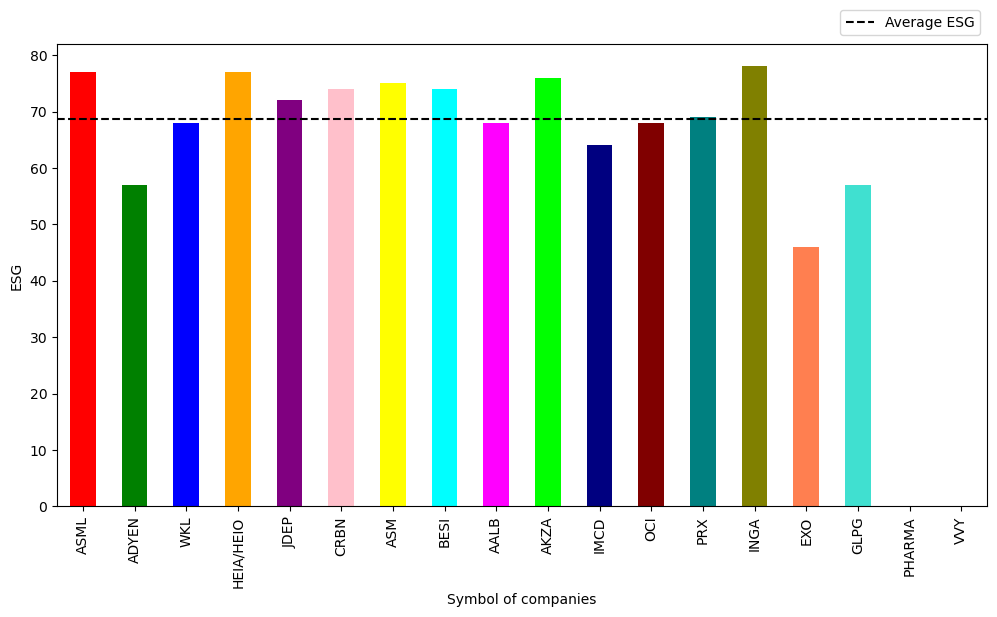

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = df.plot.bar(x = 'Symbol' , y = 'ESG' , 
            color =["red", "green", "blue", "orange", "purple", "pink",
                            "yellow", "cyan", "magenta", "lime", "navy", "maroon",
                            "teal", "olive", "coral", "turquoise", "lavender", "brown"] ,ax = ax)
average_esg = df['ESG'].mean()
ax.axhline(y=average_esg, color='black', linestyle='--', label='Average ESG')
ax.set_xlabel('Symbol of companies')
ax.set_ylabel('ESG')
handles, labels = ax.get_legend_handles_labels()
handles = [h for h, l in zip(handles, labels) if l != 'ESG']
labels = [l for l in labels if l != 'ESG']
ax.legend(handles, labels, bbox_to_anchor=(1, 1.09))
plt.show()          

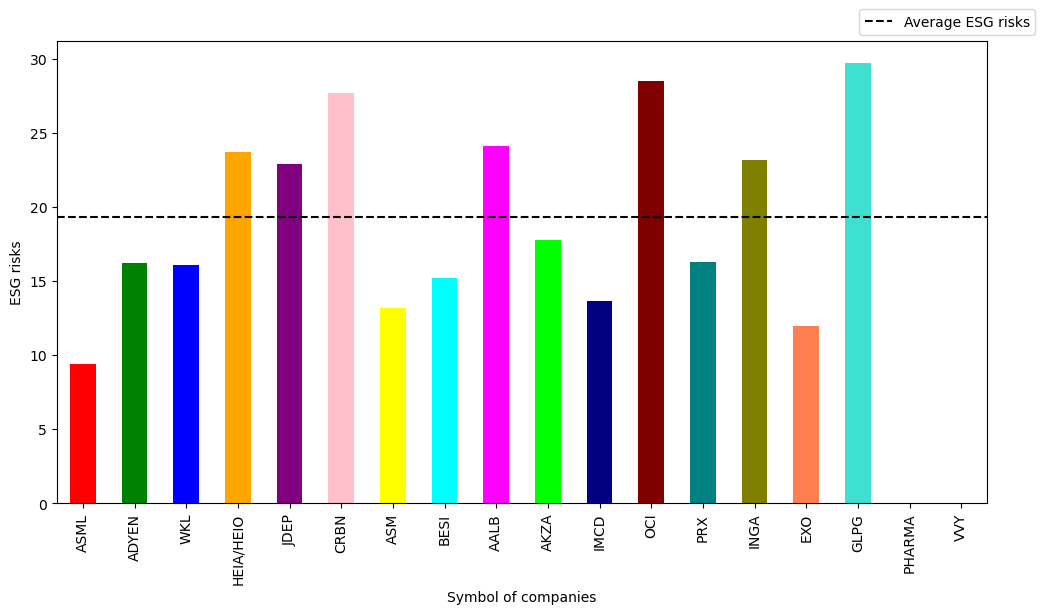

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = df.plot.bar(x = 'Symbol' , y = 'ESG risks' , 
            color =["red", "green", "blue", "orange", "purple", "pink",
                            "yellow", "cyan", "magenta", "lime", "navy", "maroon",
                            "teal", "olive", "coral", "turquoise", "lavender", "brown"] , ax = ax)

average_esg_risks = df['ESG risks'].mean()
ax.axhline(y=average_esg_risks, color='black', linestyle='--', label='Average ESG risks')
ax.set_xlabel('Symbol of companies')
ax.set_ylabel('ESG risks')
handles, labels = ax.get_legend_handles_labels()
handles = [h for h, l in zip(handles, labels) if l != 'ESG risks']
labels = [l for l in labels if l != 'ESG risks']
legend = ax.legend(handles, labels, bbox_to_anchor=(0.855, 1), fontsize='medium')
  
plt.show()          

<Axes: >

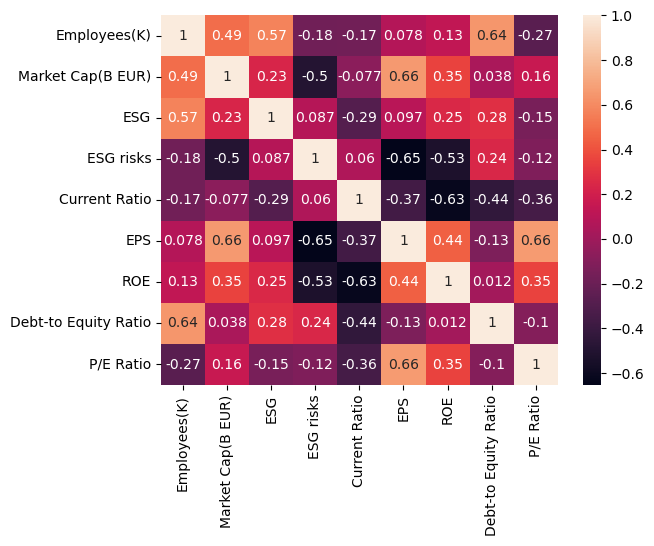

In [16]:
matrix = df.corr()
sns.heatmap(matrix, annot=True)

In [17]:
matrix.to_excel('marix.xlsx')

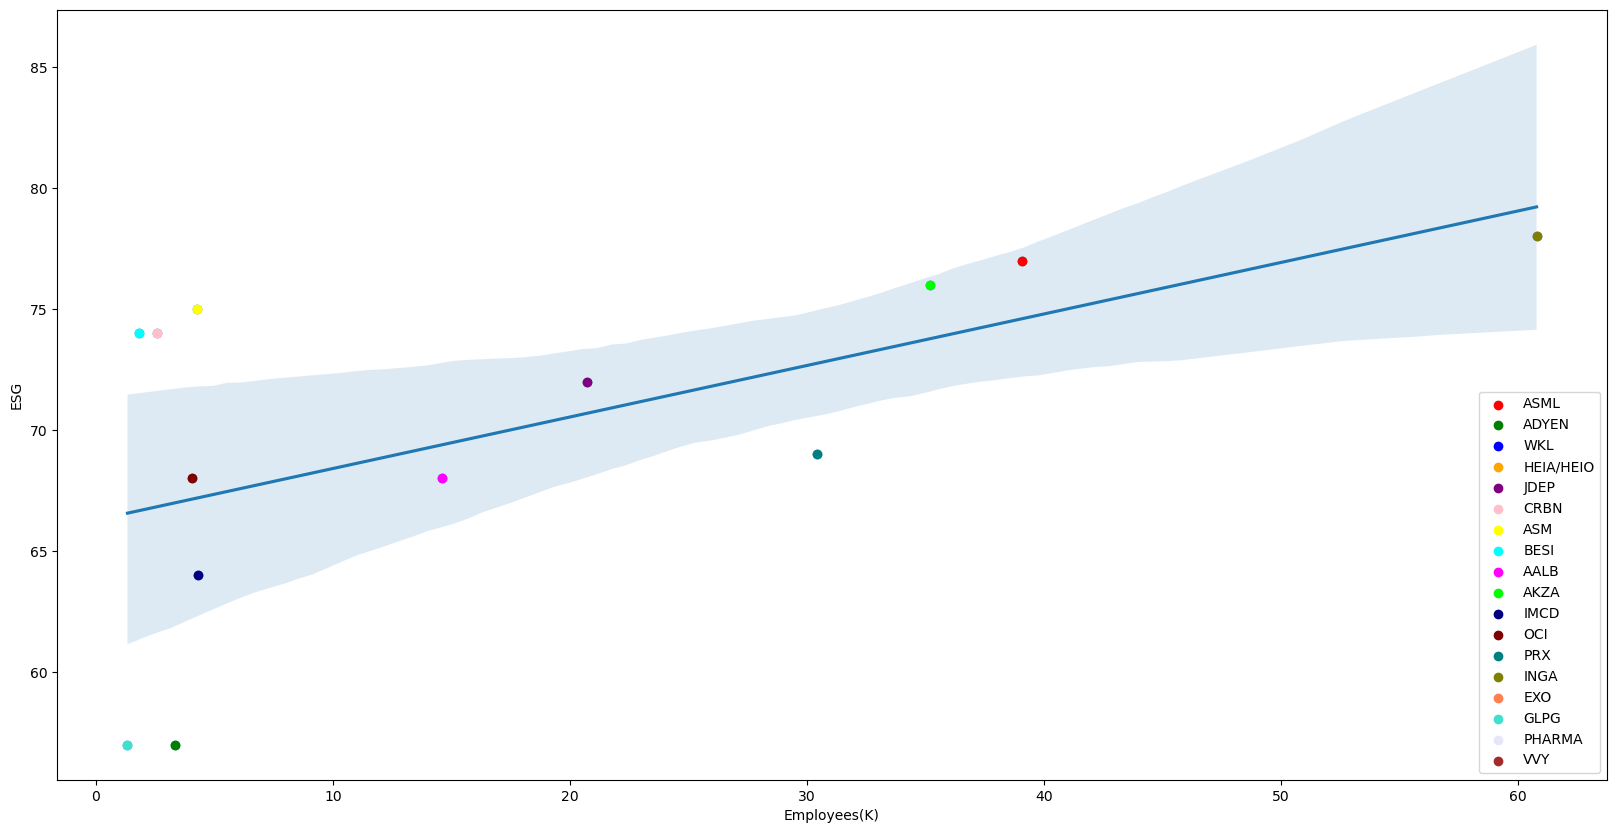

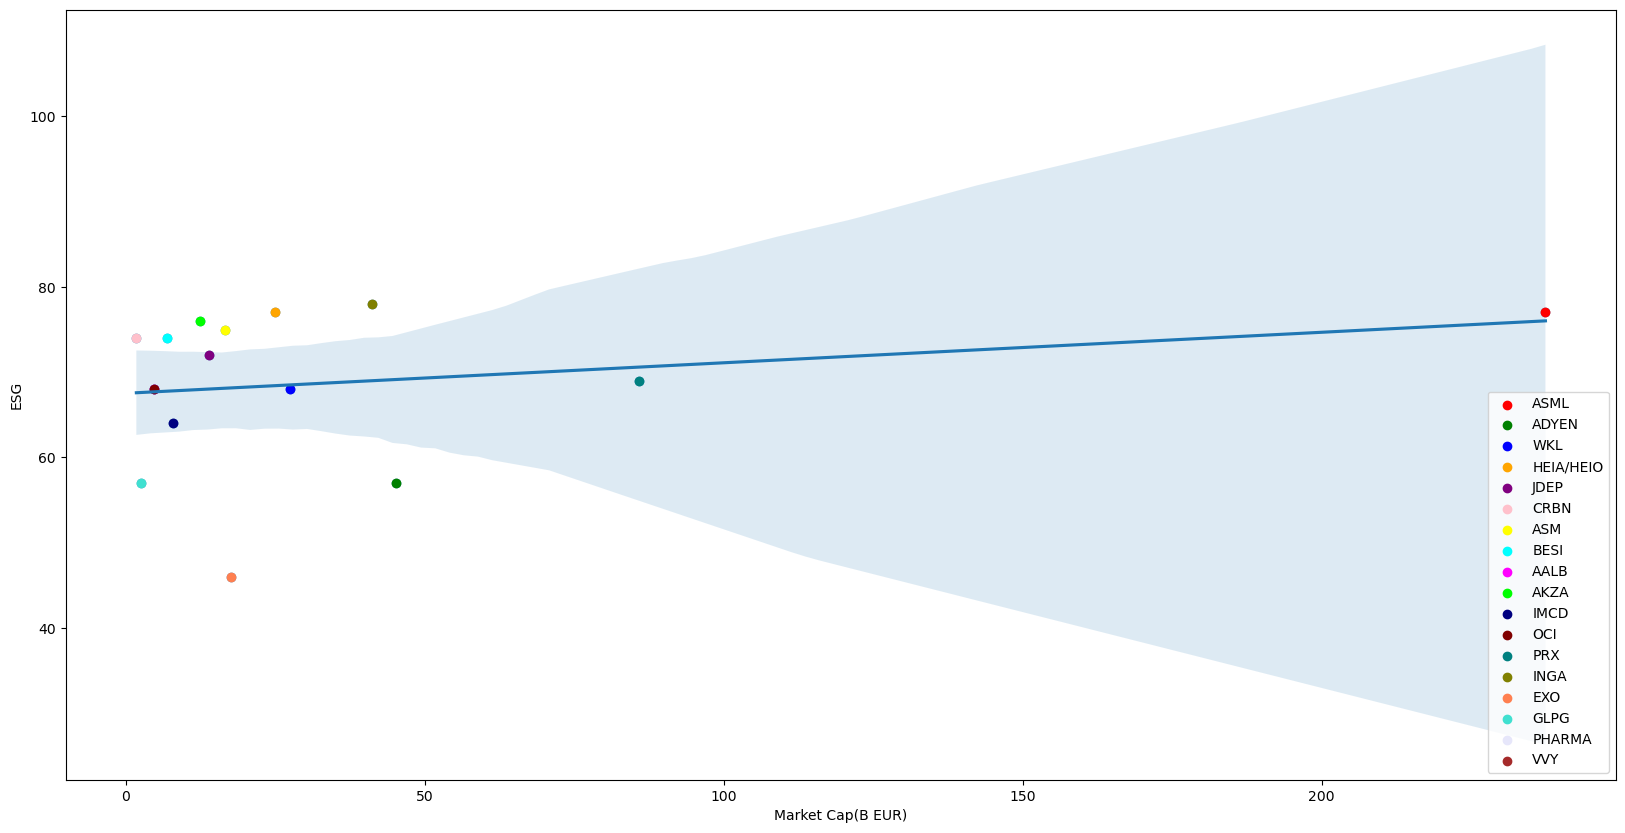

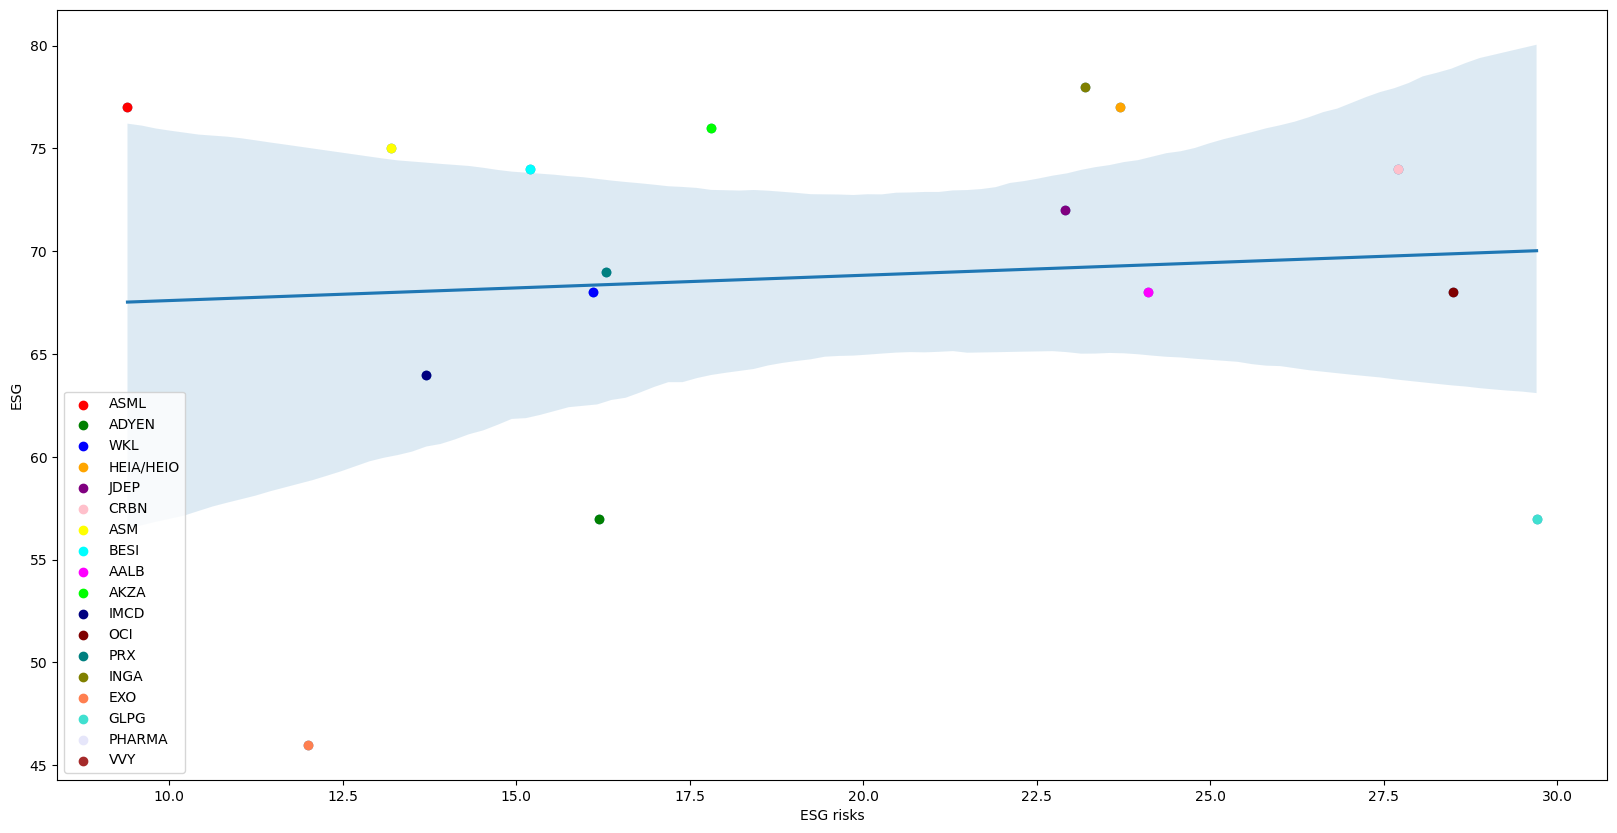

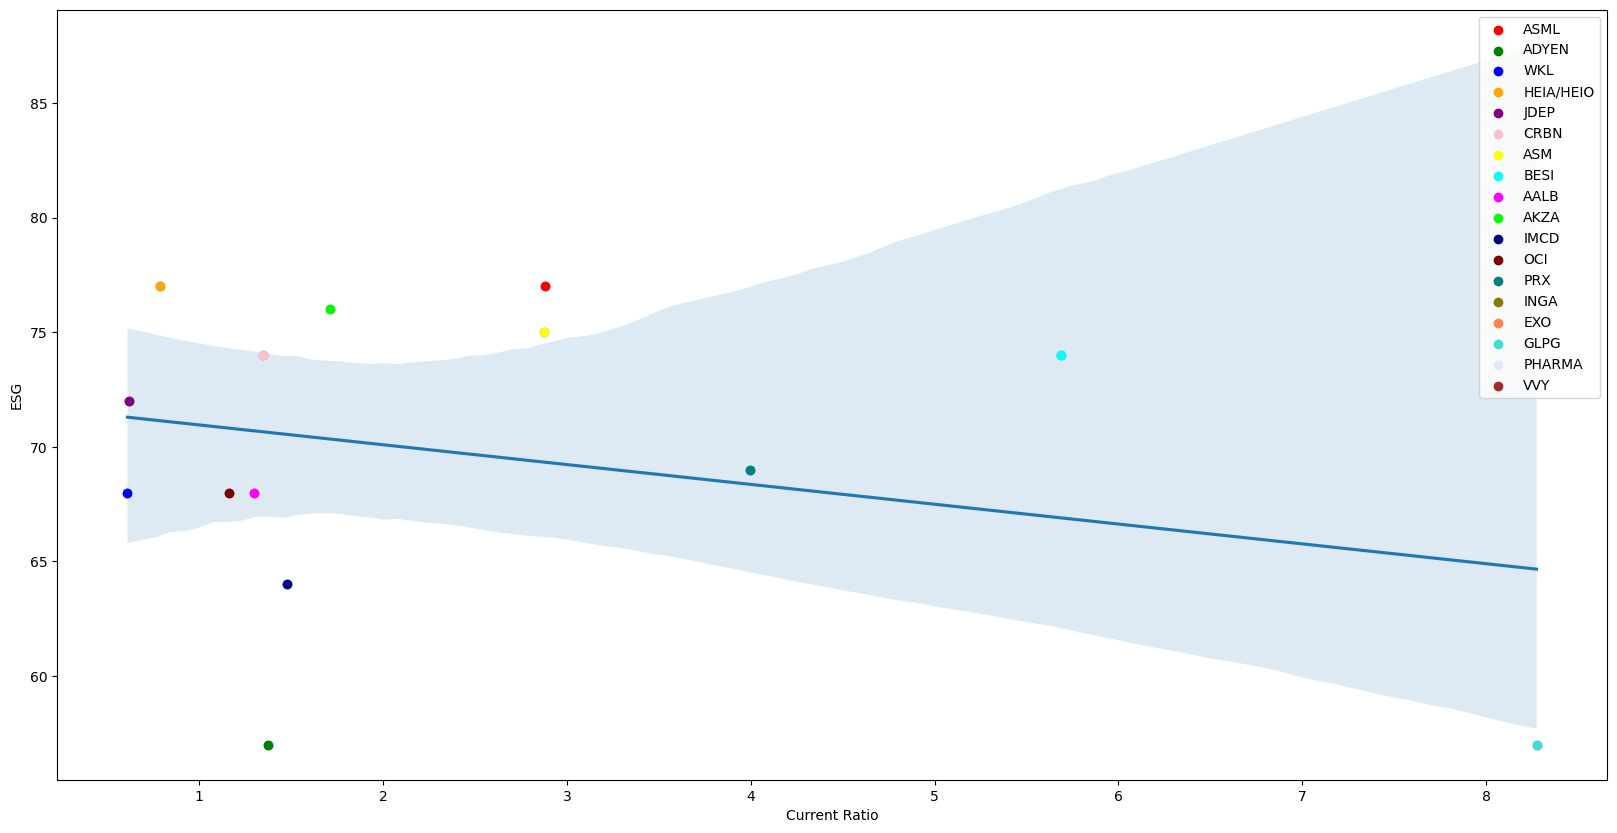

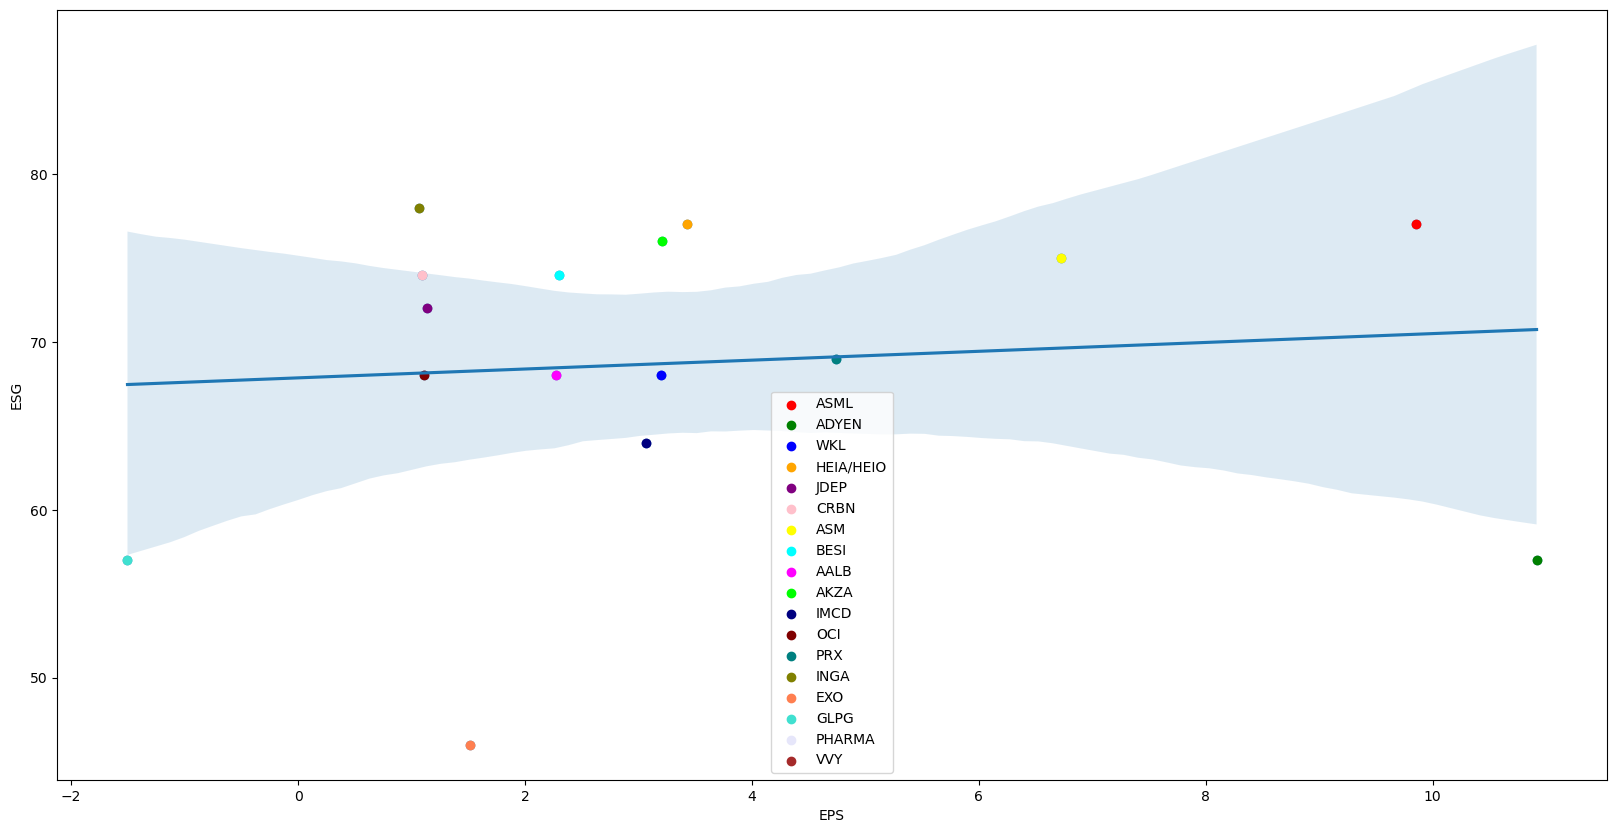

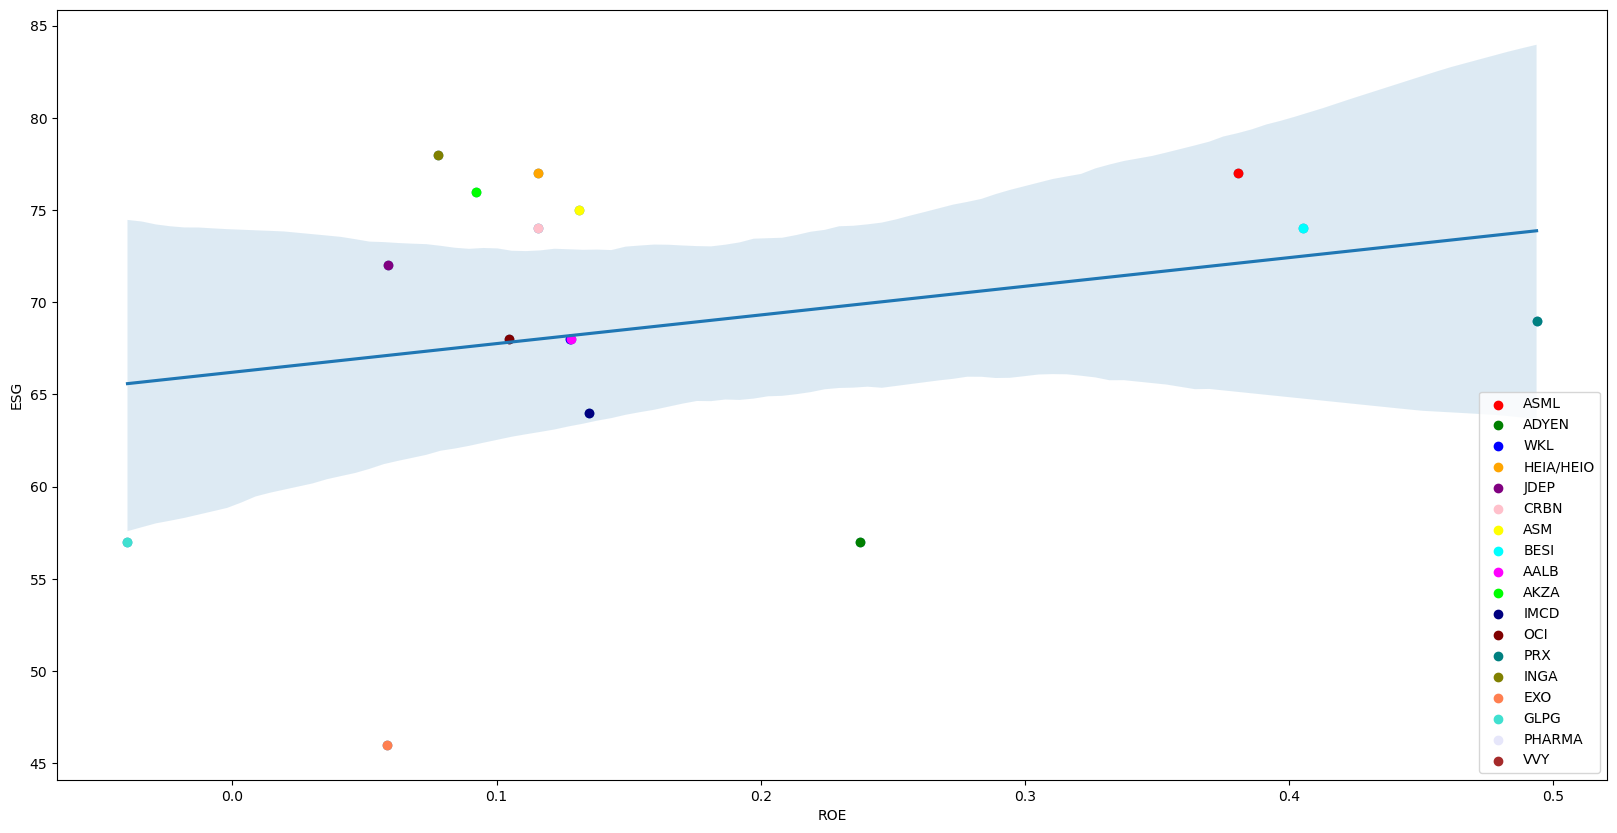

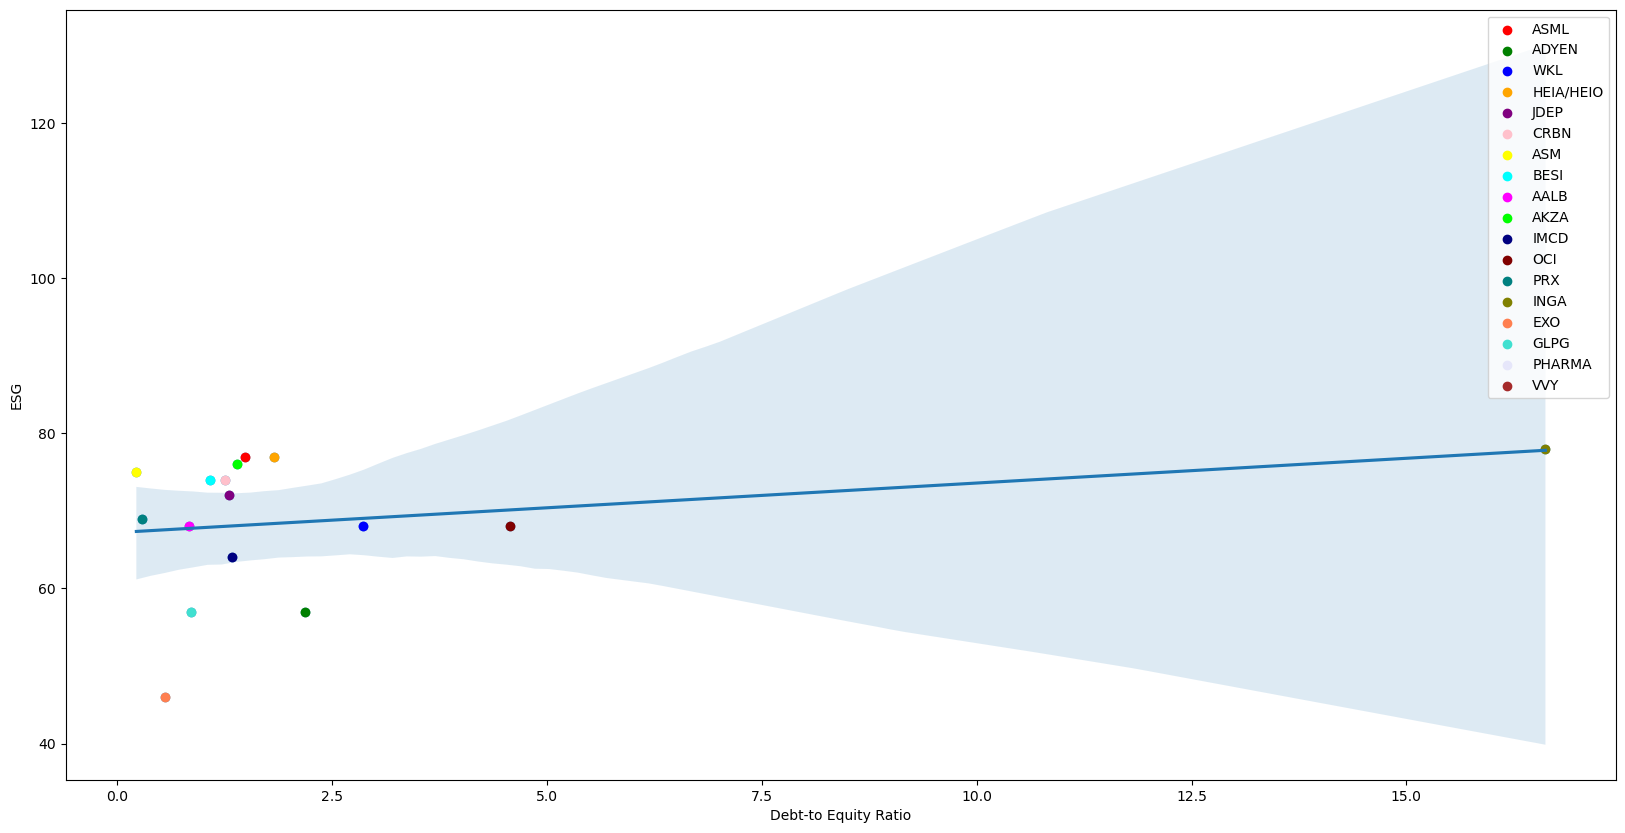

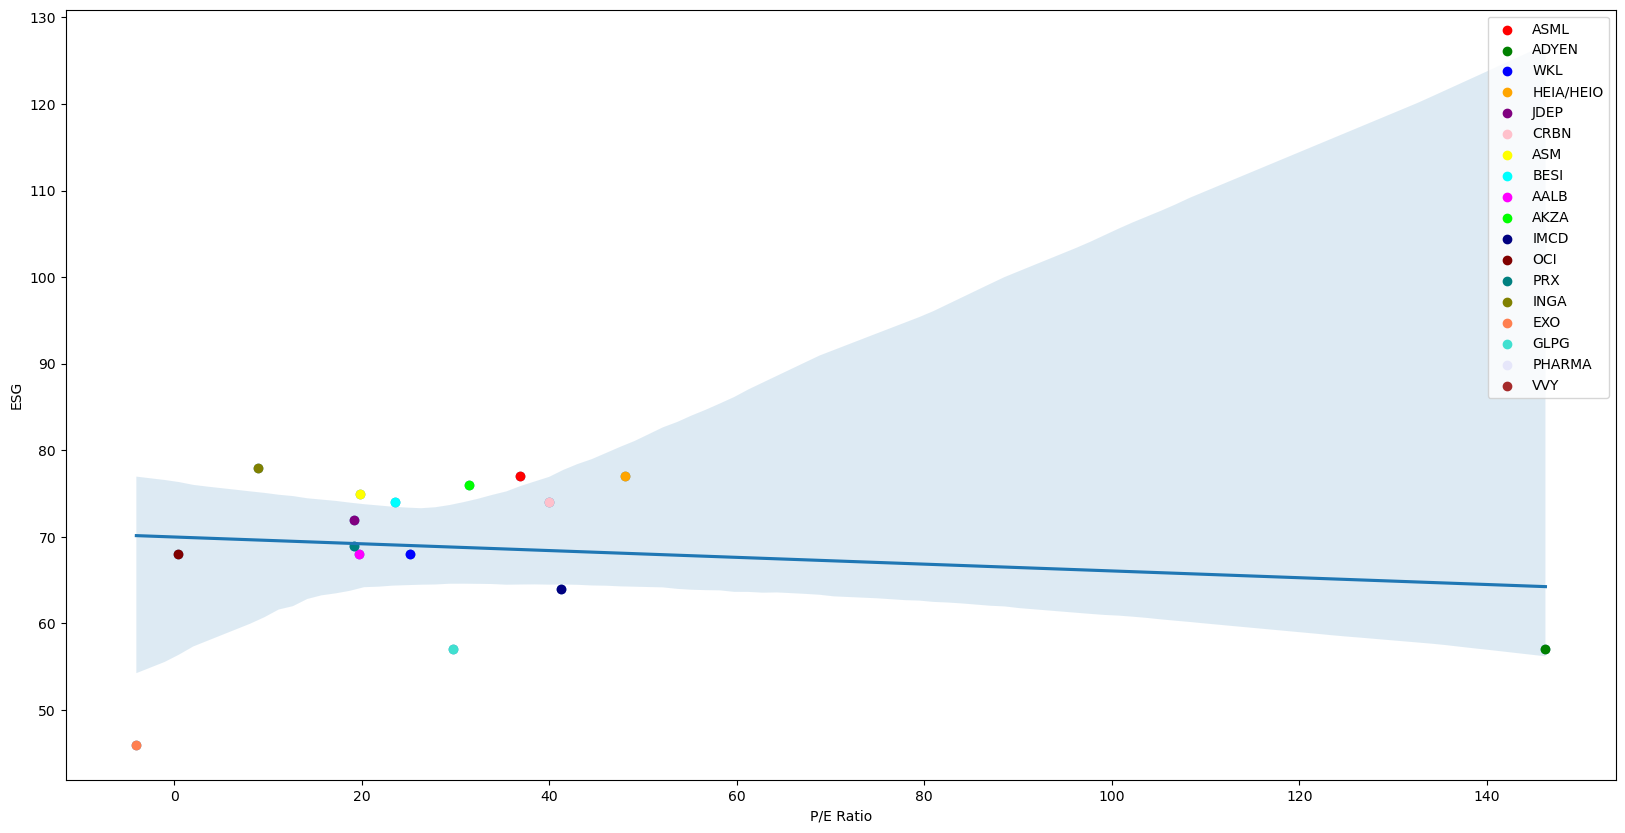

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
x_values = ["Employees(K)", "Market Cap(B EUR)", "ESG risks" , "Current Ratio" ,"EPS" , "ROE" ,
            "Debt-to Equity Ratio" , "P/E Ratio"]


for i, x in enumerate(x_values):
    plt.figure(figsize=(20,10))
    ax = sns.regplot(x=x, y="ESG", data=df ) 

    labels = df['Symbol'].unique().tolist()
    #colors = sns.color_palette("pastel", n_colors=18)
    colors = sns.color_palette(["red", "green", "blue", "orange", "purple", "pink",
                            "yellow", "cyan", "magenta", "lime", "navy", "maroon",
                            "teal", "olive", "coral", "turquoise", "lavender", "brown"])


    #colors = sns.color_palette(['red', 'green', 'blue', 'orange', 'purple', 'pink'])

    handles = [plt.scatter([], [], color=c, label=l) for c, l in zip(colors, labels)]

    ax.legend(handles=handles)

    for i in range(len(df)):
        ax.scatter(df[x][i], df['ESG'][i], color=colors[labels.index(df['Symbol'][i])]) 

    plt.show()


In [22]:
df.set_index("Symbol", inplace=True)

In [32]:
df_elect = df.iloc[:3,:]
df_elect

,Symbol,Employees(K),Market Cap(B EUR),ESG,ESG risks,Current Ratio,EPS,ROE,Debt-to Equity Ratio,P/E Ratio
0,ASML,39.086,237.412,77.0,9.4,2.880,9.850,0.3808,1.482,36.922
1,ADYEN,3.332,45.169,57.0,16.2,1.372,10.916,0.2375,2.180,146.250
2,WKL,NaN,27.370,68.0,16.1,0.610,3.200,0.1278,2.856,25.175


In [24]:
df_elect.to_excel('elect.xlsx')

<Axes: >

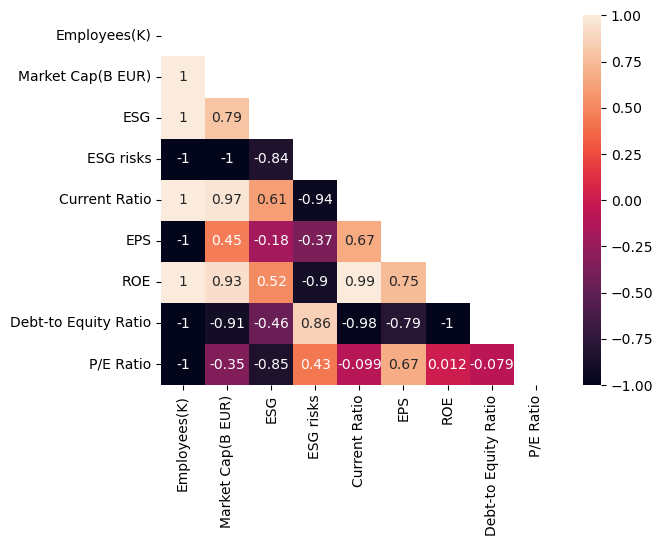

In [25]:
matrix_elect = df_elect.corr()
mask = np.triu(np.ones_like(matrix_elect, dtype=bool))
matrix_elect = matrix_elect.mask(mask)

sns.heatmap(matrix_elect, annot=True)

In [26]:
matrix_elect.to_excel('matrix_elect.xlsx')

Text(0, 0.5, 'ESG')

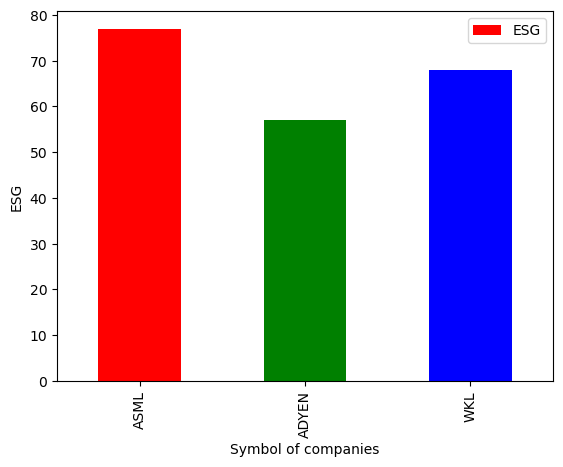

In [33]:
ax = df_elect.plot.bar(x = 'Symbol' , y = 'ESG' , 
            color =["red", "green", "blue", "orange"])
ax.set_xlabel('Symbol of companies')
ax.set_ylabel('ESG')
           

In [39]:
df_cust=df.iloc[3:6,:]
df_cust

,Symbol,Employees(K),Market Cap(B EUR),ESG,ESG risks,Current Ratio,EPS,ROE,Debt-to Equity Ratio,P/E Ratio
3,HEIA/HEIO,NaN,24.977,77.0,23.7,0.788,3.432,0.11584,1.826,48.120
4,JDEP,20.710,13.846,72.0,22.9,0.618,1.140,0.05876,1.298,19.145
5,CRBN,2.601,1.724,74.0,27.7,1.346,1.094,0.11574,1.258,39.975


In [8]:
df_cust.to_excel('cust.xlsx')

In [37]:
df_cust.set_index("Symbol", inplace=True)

<Axes: >

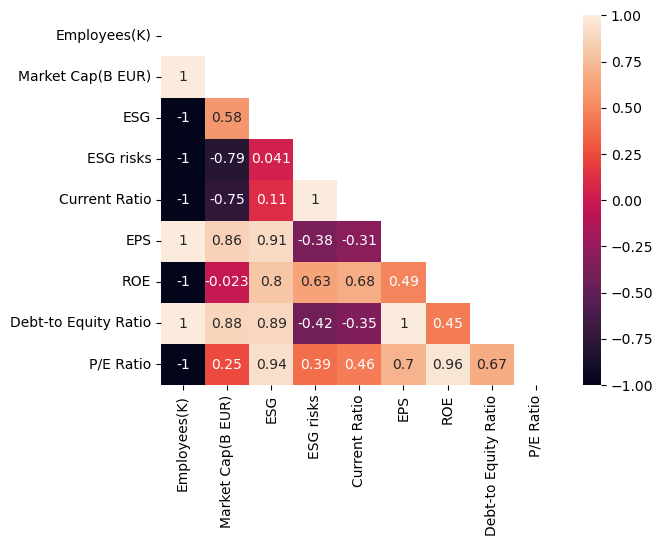

In [38]:
matrix_cust = df_cust.corr()
mask = np.triu(np.ones_like(matrix_cust, dtype=bool))
matrix_cust = matrix_cust.mask(mask)

sns.heatmap(matrix_cust, annot=True)

In [11]:
matrix_cust.to_excel('matrix_cust.xlsx')

Text(0, 0.5, 'ESG')

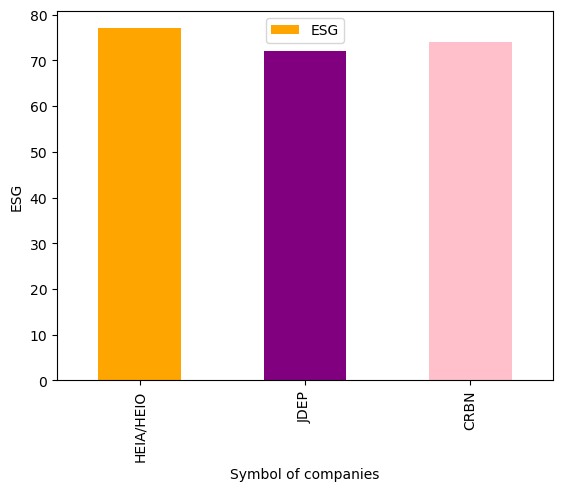

In [40]:
ax = df_cust.plot.bar(x = 'Symbol' , y = 'ESG' , 
            color =[ "orange", "purple", "pink"])
ax.set_xlabel('Symbol of companies')
ax.set_ylabel('ESG')
           

In [12]:
df_produc=df.iloc[6:9,:]
df_produc

,Employees(K),Market Cap(B EUR),ESG,ESG risks,Current Ratio,EPS,ROE,Debt-to Equity Ratio,P/E Ratio
Symbol,,,,,,,,,
ASM,4.258,16.479,75.0,13.2,2.874,6.728,0.13136,0.222,19.830
BESI,1.819,6.852,74.0,15.2,5.690,2.300,0.40530,1.078,23.502
AALB,14.597,4.628,68.0,24.1,1.300,2.276,0.12816,0.834,19.720


<AxesSubplot: >

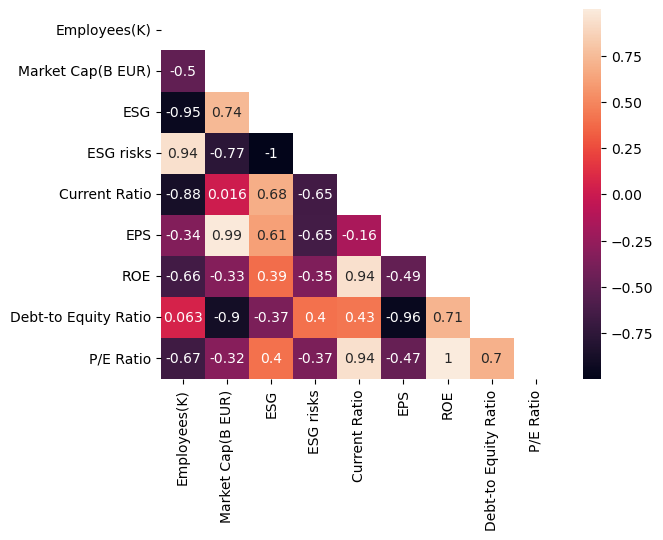

In [13]:
matrix_produc = df_produc.corr()
mask = np.triu(np.ones_like(matrix_produc, dtype=bool))
matrix_produc = matrix_produc.mask(mask)

sns.heatmap(matrix_produc, annot=True)

In [14]:
df_produc.to_excel('produc.xlsx')
matrix_produc.to_excel('matrix_produc.xlsx')

Text(0, 0.5, 'ESG')

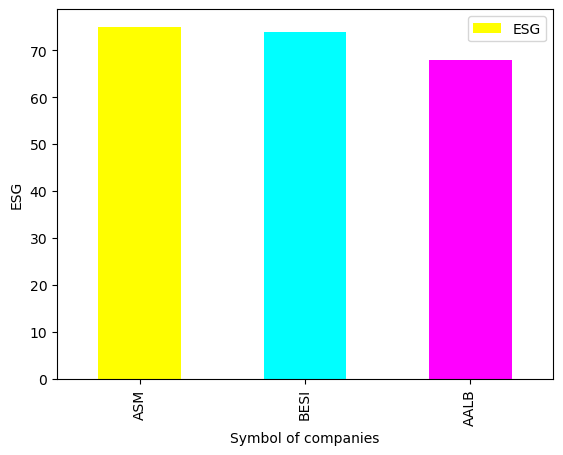

In [44]:
ax = df_produc.plot.bar(x = 'Symbol' , y = 'ESG' , 
            color =["yellow", "cyan", "magenta"])
ax.set_xlabel('Symbol of companies')
ax.set_ylabel('ESG')
           

In [15]:
df_process=df.iloc[9:12,:]
df_process

,Employees(K),Market Cap(B EUR),ESG,ESG risks,Current Ratio,EPS,ROE,Debt-to Equity Ratio,P/E Ratio
Symbol,,,,,,,,,
AKZA,35.200,12.314,76.0,17.8,1.714,3.204,0.09222,1.398,31.480
IMCD,4.323,7.875,64.0,13.7,1.478,3.070,0.13509,1.332,41.240
OCI,4.059,4.684,68.0,28.5,1.164,1.106,0.10468,4.570,0.396


<AxesSubplot: >

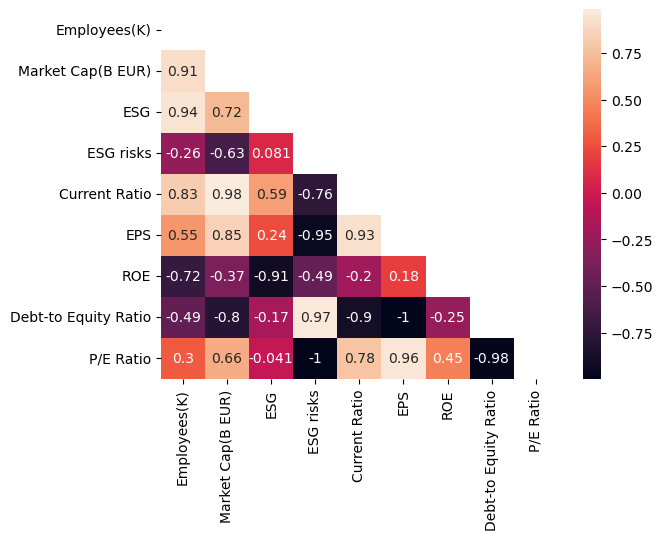

In [16]:
matrix_process = df_process.corr()
mask = np.triu(np.ones_like(matrix_process, dtype=bool))
matrix_process = matrix_process.mask(mask)

sns.heatmap(matrix_process, annot=True)

In [17]:
df_process.to_excel('process.xlsx')
matrix_process.to_excel('matrix_process.xlsx')

Text(0, 0.5, 'ESG')

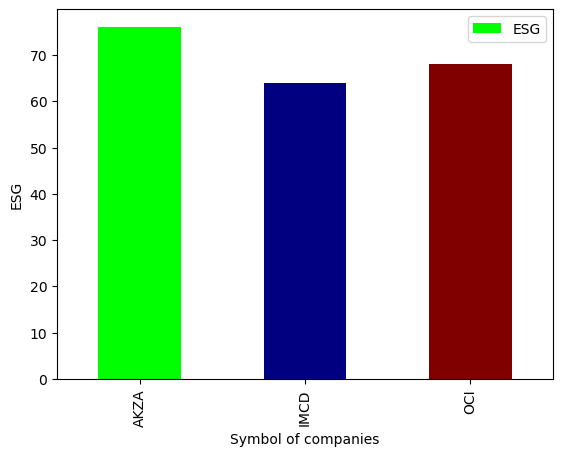

In [46]:
ax = df_process.plot.bar(x = 'Symbol' , y = 'ESG' , 
            color =[ "lime", "navy", "maroon"])
ax.set_xlabel('Symbol of companies')
ax.set_ylabel('ESG')
           

In [18]:
df_finance=df.iloc[12:15,:]
df_finance

,Employees(K),Market Cap(B EUR),ESG,ESG risks,Current Ratio,EPS,ROE,Debt-to Equity Ratio,P/E Ratio
Symbol,,,,,,,,,
PRX,30.413,85.802,69.0,16.3,3.994,4.738,0.49366,0.282,19.170
INGA,60.778,41.169,78.0,23.2,NaN,1.066,0.07774,16.618,8.892
EXO,NaN,17.575,46.0,12.0,NaN,1.516,0.05834,0.560,-4.048


<AxesSubplot: >

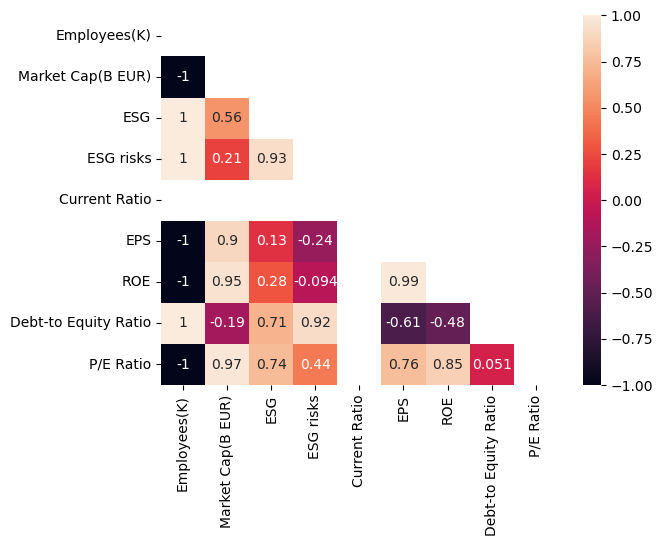

In [19]:
matrix_finance = df_finance.corr()
mask = np.triu(np.ones_like(matrix_finance, dtype=bool))
matrix_finance = matrix_finance.mask(mask)

sns.heatmap(matrix_finance, annot=True)

In [20]:
df_finance.to_excel('finance.xlsx')
matrix_finance.to_excel('matrix_finance.xlsx')

Text(0, 0.5, 'ESG')

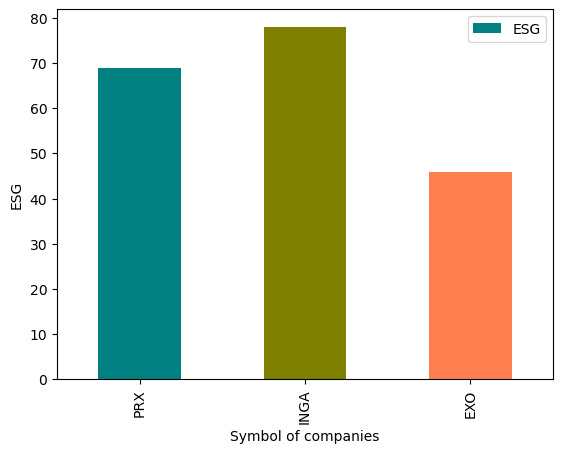

In [48]:
ax = df_finance.plot.bar(x = 'Symbol' , y = 'ESG' , 
            color =["teal", "olive", "coral"])
ax.set_xlabel('Symbol of companies')
ax.set_ylabel('ESG')
           

In [21]:
df_health=df.iloc[15:18,:]
df_health

,Employees(K),Market Cap(B EUR),ESG,ESG risks,Current Ratio,EPS,ROE,Debt-to Equity Ratio,P/E Ratio
Symbol,,,,,,,,,
GLPG,1.338,2.49600,57.0,29.7,8.274,-1.504,-0.03972,0.852,29.7000
PHARMA,NaN,0.66850,NaN,NaN,3.172,0.038,0.26558,1.430,26.7500
VVY,NaN,0.40063,NaN,NaN,11.610,-0.577,-1.06230,0.630,-13.0975


<AxesSubplot: >

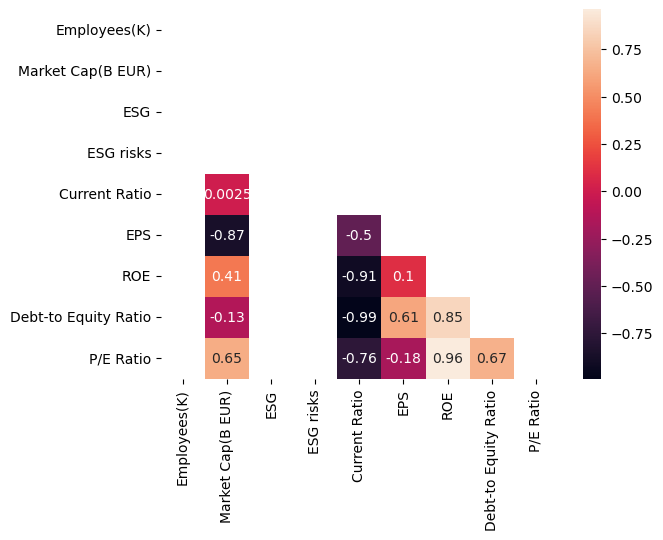

In [22]:
matrix_health = df_health.corr()
mask = np.triu(np.ones_like(matrix_health, dtype=bool))
matrix_health = matrix_health.mask(mask)

sns.heatmap(matrix_health, annot=True)

In [23]:
df_health.to_excel('health.xlsx')
matrix_health.to_excel('matrix_health.xlsx')

Text(0, 0.5, 'ESG')

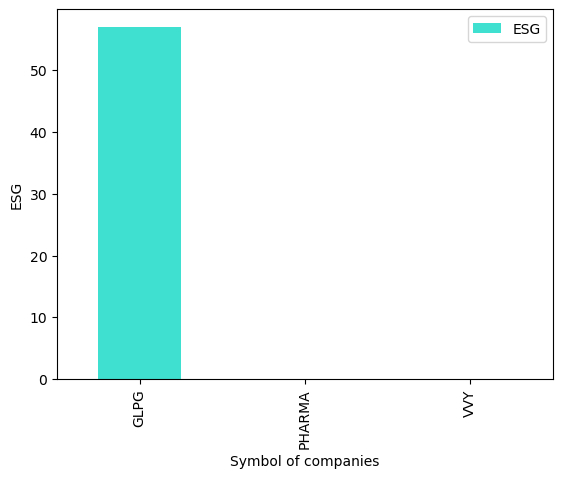

In [51]:
ax = df_health.plot.bar(x = 'Symbol' , y = 'ESG' , 
            color =[ "turquoise", "lavender", "brown"])
ax.set_xlabel('Symbol of companies')
ax.set_ylabel('ESG')
           